In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\CSV&EXCELFiles\INTERN_EDA_TASK_DATA\intern_data_2.csv")

In [3]:
df.head(3)

VIN (1-10)  County      City State  Postal Code  Model Year       Make  \
0  JTMEB3FV6N  Monroe  Key West    FL        33040        2022     TOYOTA   
1  1G1RD6E45D   Clark  Laughlin    NV        89029        2013  CHEVROLET   
2  JN1AZ0CP8B  Yakima    Yakima    WA        98901        2011     NISSAN   

        Model                   Electric Vehicle Type  \
0  RAV4 PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
1        VOLT  Plug-in Hybrid Electric Vehicle (PHEV)   
2        LEAF          Battery Electric Vehicle (BEV)   

  Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
0           Clean Alternative Fuel Vehicle Eligible              42   
1           Clean Alternative Fuel Vehicle Eligible              38   
2           Clean Alternative Fuel Vehicle Eligible              73   

   Base MSRP  Legislative District  DOL Vehicle ID  \
0          0                   NaN       198968248   
1          0                   NaN         5204412   
2          0                  15.0       218972519   

              Vehicle Location Electric Utility  2020 Census Tract  
0    POINT (-81.80023 24.5545)              NaN        12087972100  
1  POINT (-114.57245 35.16815)              NaN        32003005702  
2  POINT (-120.50721 46.60448)       PACIFICORP        53077001602

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112634 entries, 0 to 112633
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         112634 non-null  object 
 1   County                                             112634 non-null  object 
 2   City                                               112634 non-null  object 
 3   State                                              112634 non-null  object 
 4   Postal Code                                        112634 non-null  int64  
 5   Model Year                                         112634 non-null  int64  
 6   Make                                               112634 non-null  object 
 7   Model                                              112614 non-null  object 
 8   Electric Vehicle Type                              112634 non-null  object

In [5]:
df.isnull().sum()

VIN (1-10)                                             0
County                                                 0
City                                                   0
State                                                  0
Postal Code                                            0
Model Year                                             0
Make                                                   0
Model                                                 20
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 286
DOL Vehicle ID                                         0
Vehicle Location                                      24
Electric Utility                                     443
2020 Census Tract                                      0
dtype: int64

# # Handling missing values

In [6]:
# For 'Model' and 'Vehicle Location', filling missing values with 'Unknown'
# For 'Legislative District' and 'Electric Utility', filling missing values with '0' as they are numerical
df['Model'].fillna('Unknown', inplace=True)
df['Vehicle Location'].fillna('Unknown', inplace=True)
df['Legislative District'].fillna(0, inplace=True)
df['Electric Utility'].fillna('Unknown', inplace=True)

In [7]:
df.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

# remove duplicates

In [8]:
# Removing any duplicates
df.duplicated().sum()

0

<Figure size 1500x1000 with 0 Axes>

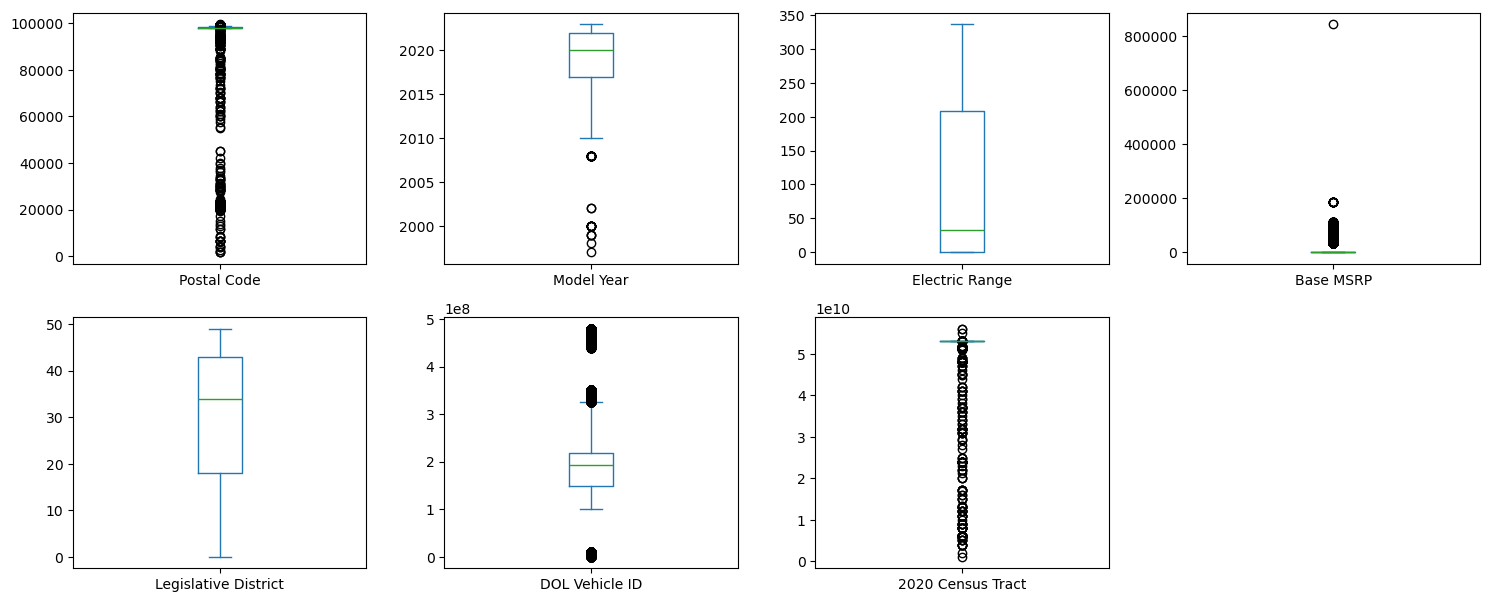

In [9]:
# Selecting only numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for each numerical column to visually inspect outliers
plt.figure(figsize=(15, 10))
df[numerical_columns].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

In [10]:
import pandas as pd

def remove_outliers(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    # Interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df_filtered

# Example: Applying outlier removal for all numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    df = remove_outliers(df,col)

# Displaying the cleaned dataframe without outliers
df

VIN (1-10)     County           City State  Postal Code  Model Year  \
3       1G1FW6S08H     Skagit       Concrete    WA        98237        2017   
6       1N4AZ0CP4D  Snohomish        Everett    WA        98203        2013   
7       1N4AZ0CP0D  Snohomish       Mukilteo    WA        98275        2013   
10      WA1F2AFY1L   Thurston          Lacey    WA        98516        2020   
14      5YJ3E1EA1J     Skagit     Burlington    WA        98233        2018   
...            ...        ...            ...   ...          ...         ...   
112629  7SAYGDEF2N       King         Duvall    WA        98019        2022   
112630  1N4BZ1CP7K   San Juan  Friday Harbor    WA        98250        2019   
112631  1FMCU0KZ4N       King         Vashon    WA        98070        2022   
112632  KNDCD3LD4J       King      Covington    WA        98042        2018   
112633  YV4BR0CL8N       King      Covington    WA        98042        2022   

             Make    Model                   Electric Vehicle Type  \
3       CHEVROLET  BOLT EV          Battery Electric Vehicle (BEV)   
6          NISSAN     LEAF          Battery Electric Vehicle (BEV)   
7          NISSAN     LEAF          Battery Electric Vehicle (BEV)   
10           AUDI     Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
14          TESLA  MODEL 3          Battery Electric Vehicle (BEV)   
...           ...      ...                                     ...   
112629      TESLA  MODEL Y          Battery Electric Vehicle (BEV)   
112630     NISSAN     LEAF          Battery Electric Vehicle (BEV)   
112631       FORD   ESCAPE  Plug-in Hybrid Electric Vehicle (PHEV)   
112632        KIA     NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
112633      VOLVO     XC90  Plug-in Hybrid Electric Vehicle (PHEV)   

        Clean Alternative Fuel Vehicle (CAFV) Eligibility  Electric Range  \
3                 Clean Alternative Fuel Vehicle Eligible             238   
6                 Clean Alternative Fuel Vehicle Eligible              75   
7                 Clean Alternative Fuel Vehicle Eligible              75   
10                  Not eligible due to low battery range              20   
14                Clean Alternative Fuel Vehicle Eligible             215   
...                                                   ...             ...   
112629  Eligibility unknown as battery range has not b...               0   
112630            Clean Alternative Fuel Vehicle Eligible             150   
112631            Clean Alternative Fuel Vehicle Eligible              38   
112632              Not eligible due to low battery range              26   
112633              Not eligible due to low battery range              18   

        Base MSRP  Legislative District  DOL Vehicle ID  \
3               0                  39.0       186750406   
6               0                  38.0       253546023   
7               0                  21.0       176817364   
10              0                  22.0       103317238   
14              0                  40.0       211534823   
...           ...                   ...             ...   
112629          0                  45.0       217955265   
112630          0                  40.0       103663227   
112631          0                  34.0       193878387   
112632          0                  47.0       125039043   
112633          0                  47.0       194673692   

                   Vehicle Location  \
3        POINT (-121.7515 48.53892)   
6       POINT (-122.23019 47.94949)   
7       POINT (-122.29196 47.89908)   
10      POINT (-122.75379 47.06316)   
14      POINT (-122.33029 48.46846)   
...                             ...   
112629  POINT (-121.98609 47.74068)   
112630  POINT (-123.01648 48.53448)   
112631   POINT (-122.4573 47.44929)   
112632  POINT (-122.09124 47.33778)   
112633  POINT (-122.09124 47.33778)   

                                         Electric Utility  2020 Census Tract  
3                                  P

<Figure size 1500x1000 with 0 Axes>

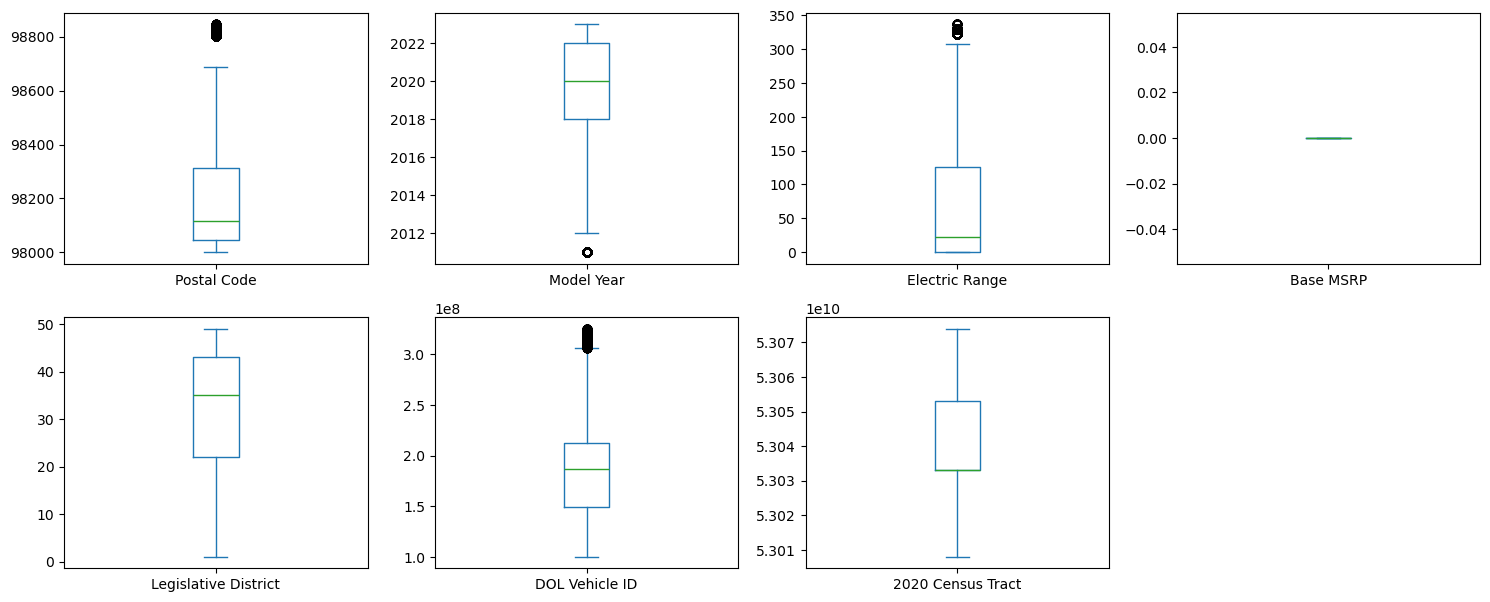

In [11]:
# Selecting only numerical columns for outlier detection
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Creating box plots for each numerical column to visually inspect outliers
plt.figure(figsize=(15, 10))
df[numerical_columns].plot(kind='box', subplots=True, layout=(5, 4), figsize=(15, 15), sharex=False, sharey=False)
plt.tight_layout()
plt.show()

Descriptive Statistics for Numerical Columns:
        Postal Code    Model Year  Electric Range  Base MSRP  \
count  88306.000000  88306.000000    88306.000000    88306.0   
mean   98204.266607   2019.344257       74.015650        0.0   
std      204.000755      2.889205       98.104182        0.0   
min    98001.000000   2011.000000        0.000000        0.0   
25%    98045.000000   2018.000000        0.000000        0.0   
50%    98117.000000   2020.000000       22.000000        0.0   
75%    98312.000000   2022.000000      125.000000        0.0   
max    98847.000000   2023.000000      337.000000        0.0   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count          88306.000000    8.830600e+04       8.830600e+04  
mean              31.051197    1.845989e+08       5.303910e+10  
std               14.085942    4.606134e+07       1.526733e+07  
min                1.000000    1.000216e+08       5.300796e+10  
25%               22.000000    1.490780e+08       5.

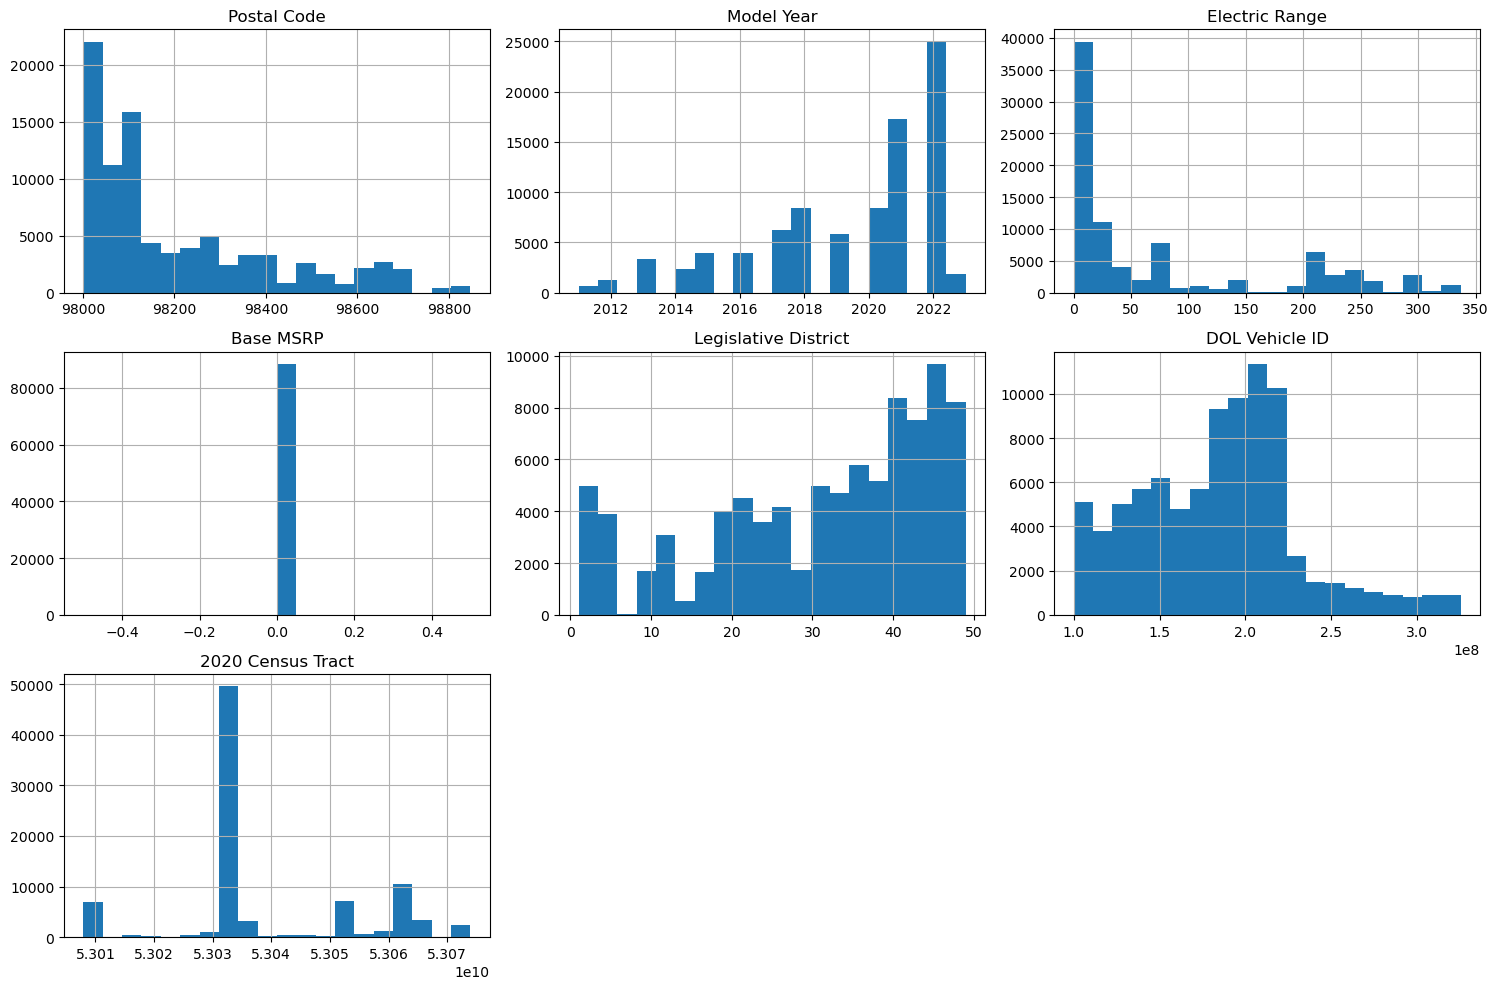

In [12]:
# Numerical Columns - Univariate Analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Descriptive Statistics for Numerical Columns
print("Descriptive Statistics for Numerical Columns:")
print(df[numerical_columns].describe())

# Plot Histograms for Numerical Columns
df[numerical_columns].hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')


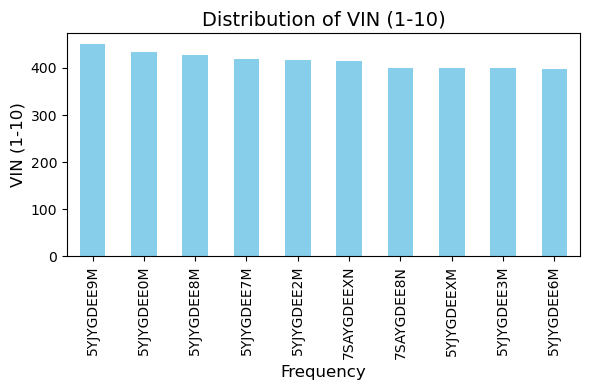

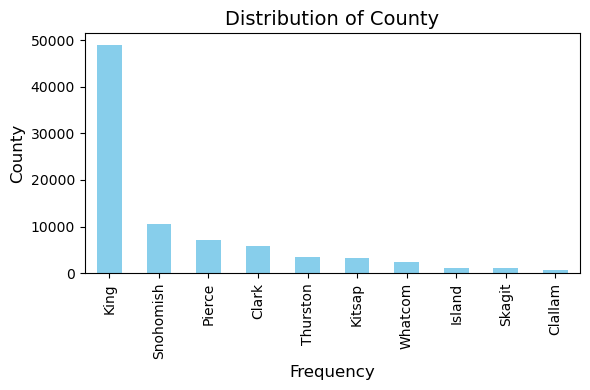

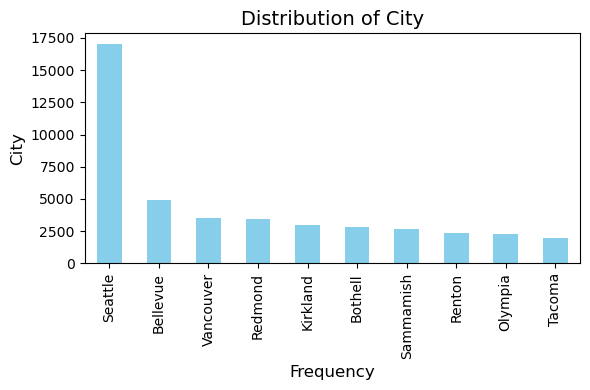

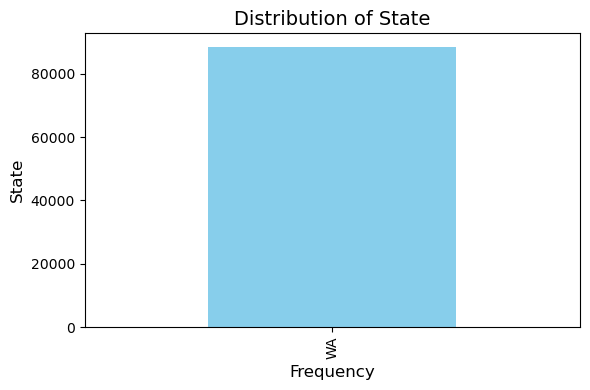

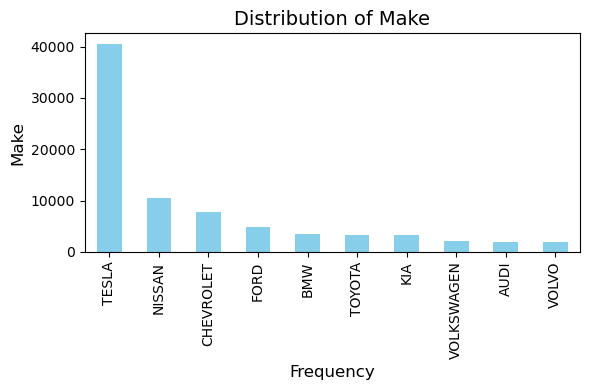

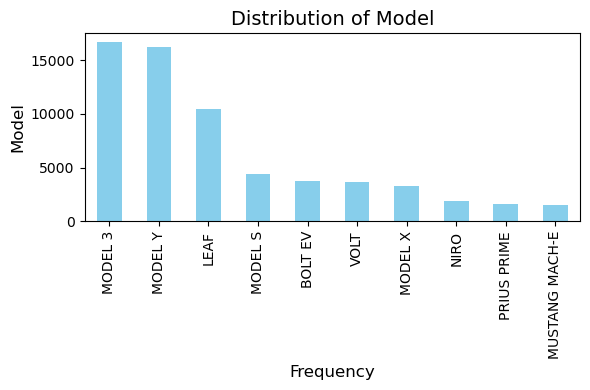

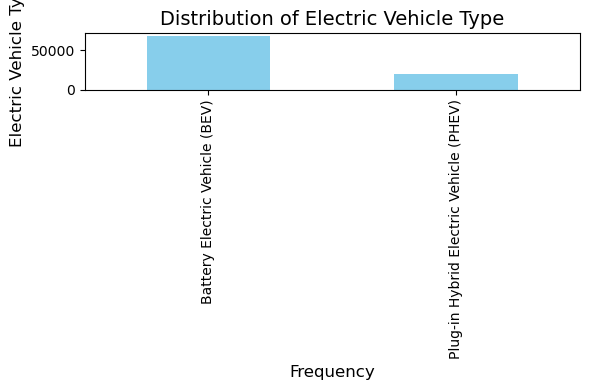

C:\Users\Dell\AppData\Local\Temp\ipykernel_17748\448003243.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


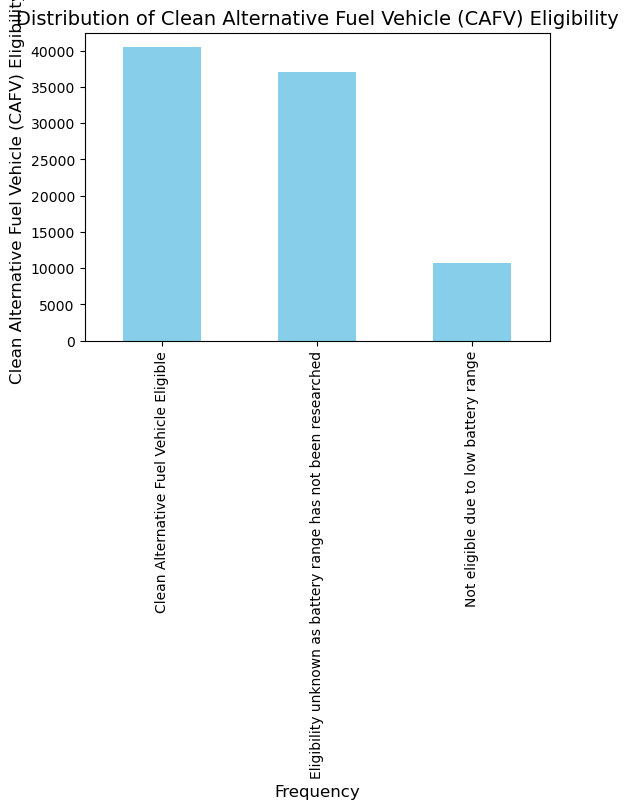

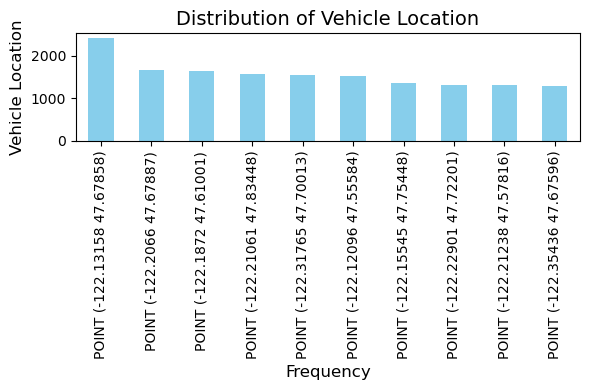

C:\Users\Dell\AppData\Local\Temp\ipykernel_17748\448003243.py:26: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


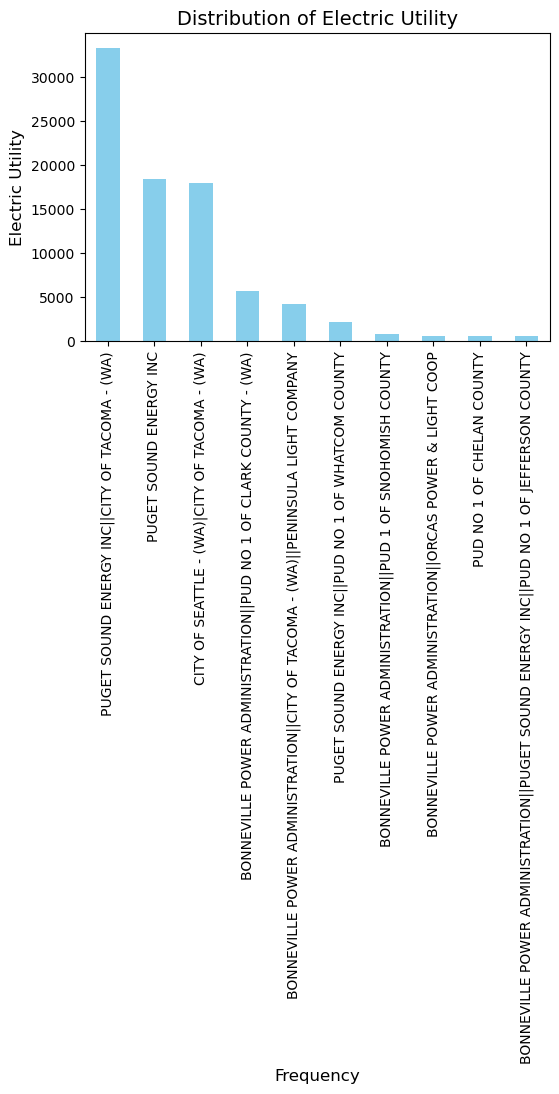

In [13]:
# Selecting categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Display the categorical columns
print(categorical_columns)


# Value Counts and Bar Plots for Categorical Columns
for col in categorical_columns:
    # Sorting by frequency
    value_counts = df[col].value_counts().sort_values(ascending=False)
    
    # Limiting to top 10 categories (if needed)
    if len(value_counts) > 10:
        value_counts = value_counts[:10]

    # Plotting horizontal bar plot for better readability
    value_counts.plot(kind='bar', figsize=(6,4), color='skyblue')
    
    # Adding title and labels
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Frequency', fontsize=12)
    plt.ylabel(col, fontsize=12)
    
    # Display plot
    plt.tight_layout()
    plt.show()


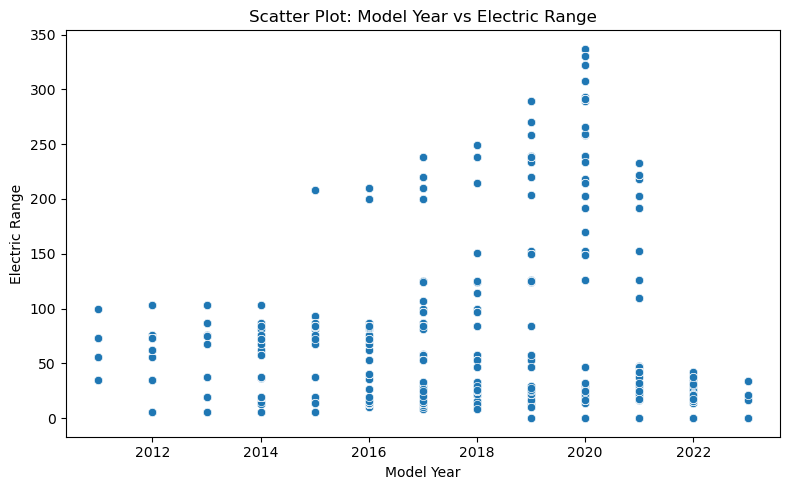

Correlation between Model Year and Electric Range: -0.30


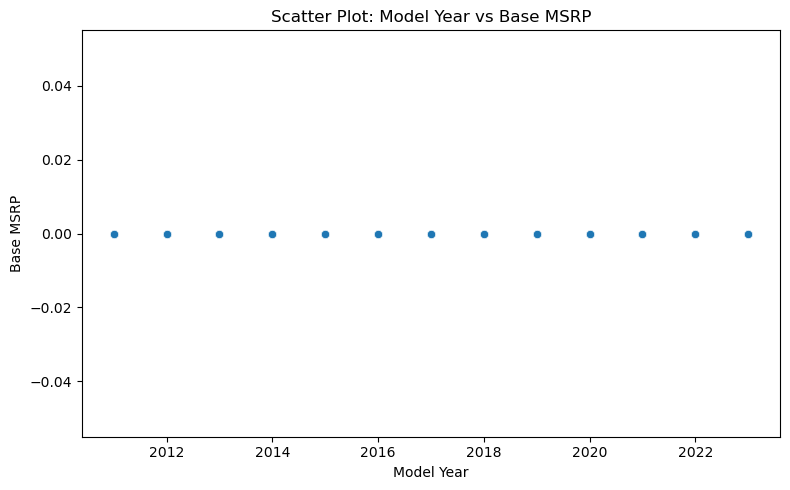

C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Correlation between Model Year and Base MSRP: nan


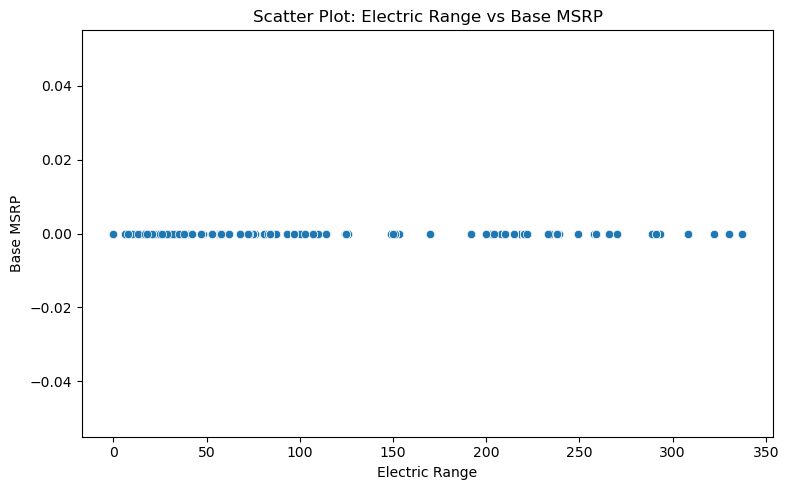

Correlation between Electric Range and Base MSRP: nan


C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Dell\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


# Specify useful numerical and categorical columns
useful_numerical_columns = ['Model Year', 'Electric Range', 'Base MSRP']
useful_categorical_columns = ['Make', 'Model', 'Electric Vehicle Type', 'County', 'State']

# 1. Numerical vs Numerical Analysis
for i in range(len(useful_numerical_columns)):
    for j in range(i + 1, len(useful_numerical_columns)):
        plt.figure(figsize=(8, 5))
        sns.scatterplot(x=df[useful_numerical_columns[i]], y=df[useful_numerical_columns[j]])
        plt.title(f'Scatter Plot: {useful_numerical_columns[i]} vs {useful_numerical_columns[j]}')
        plt.xlabel(useful_numerical_columns[i])
        plt.ylabel(useful_numerical_columns[j])
        plt.tight_layout()
        plt.show()

        # Calculate and display correlation
        correlation = df[useful_numerical_columns[i]].corr(df[useful_numerical_columns[j]])
        print(f'Correlation between {useful_numerical_columns[i]} and {useful_numerical_columns[j]}: {correlation:.2f}')

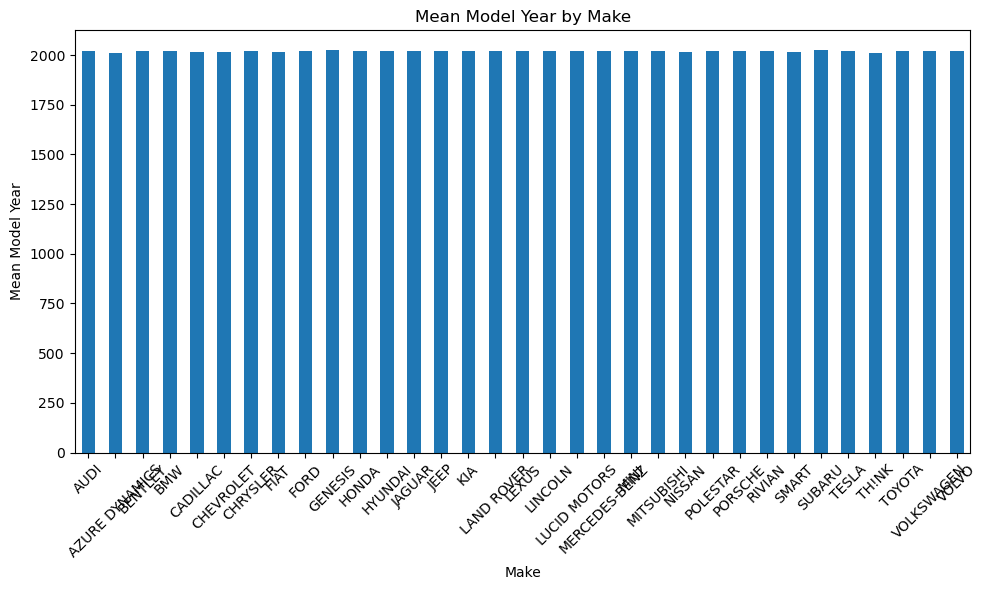

ANOVA test between Make and Model Year: F-statistic = 1378.63, p-value = 0.000


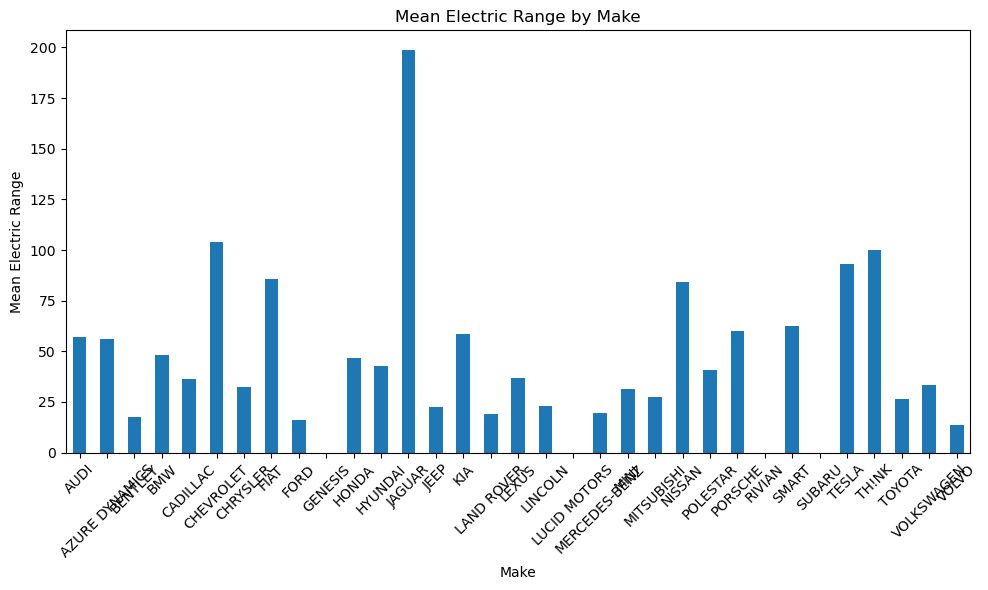

ANOVA test between Make and Electric Range: F-statistic = 291.41, p-value = 0.000


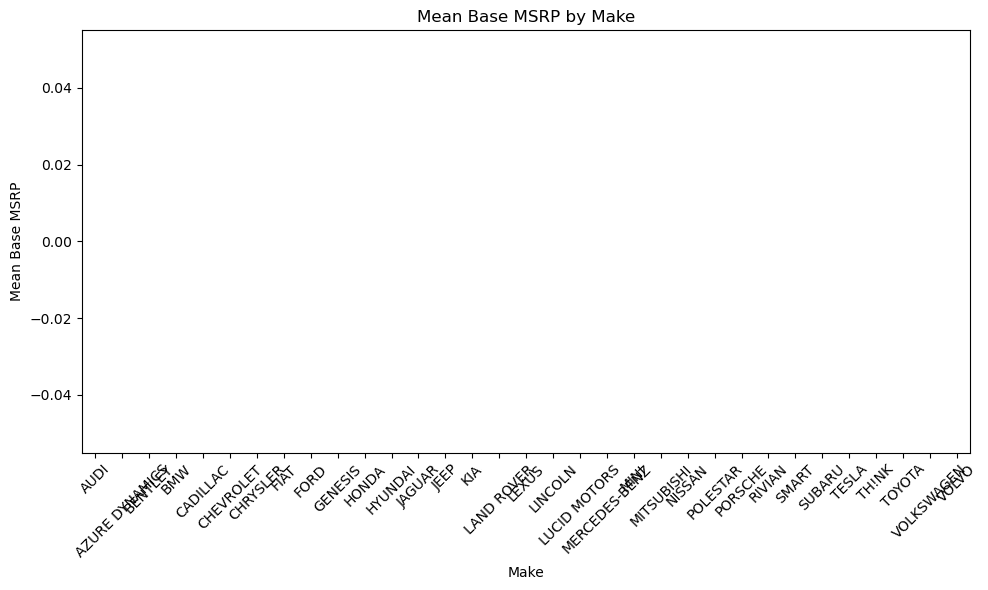

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA test between Make and Base MSRP: F-statistic = nan, p-value = nan


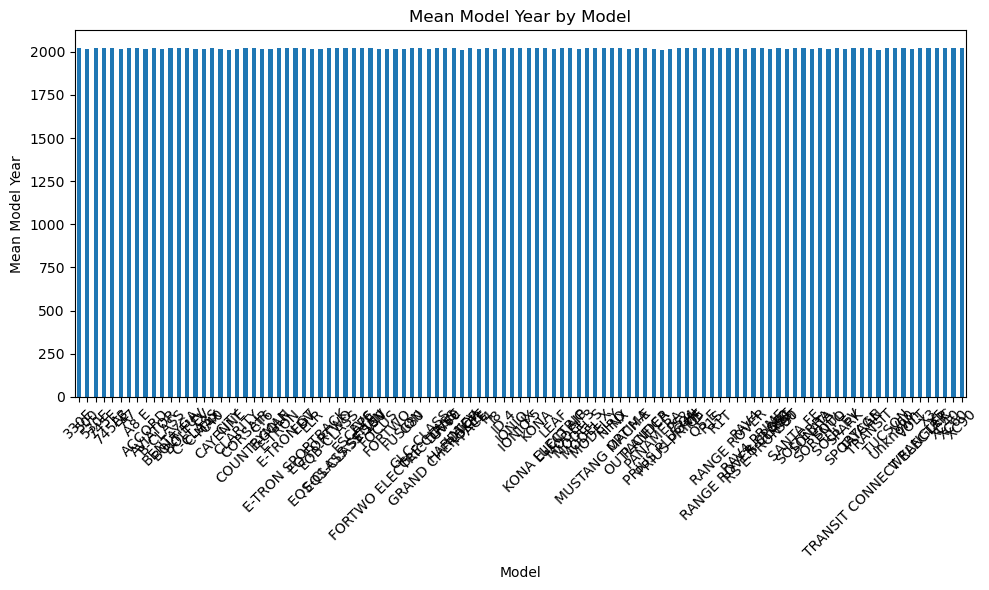

ANOVA test between Model and Model Year: F-statistic = 1317.61, p-value = 0.000


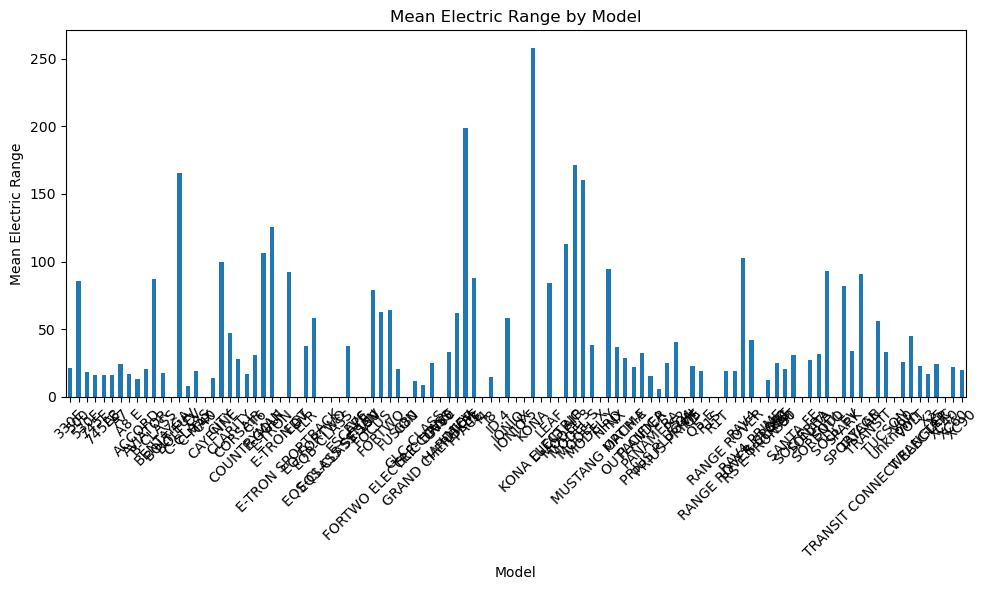

ANOVA test between Model and Electric Range: F-statistic = 324.91, p-value = 0.000


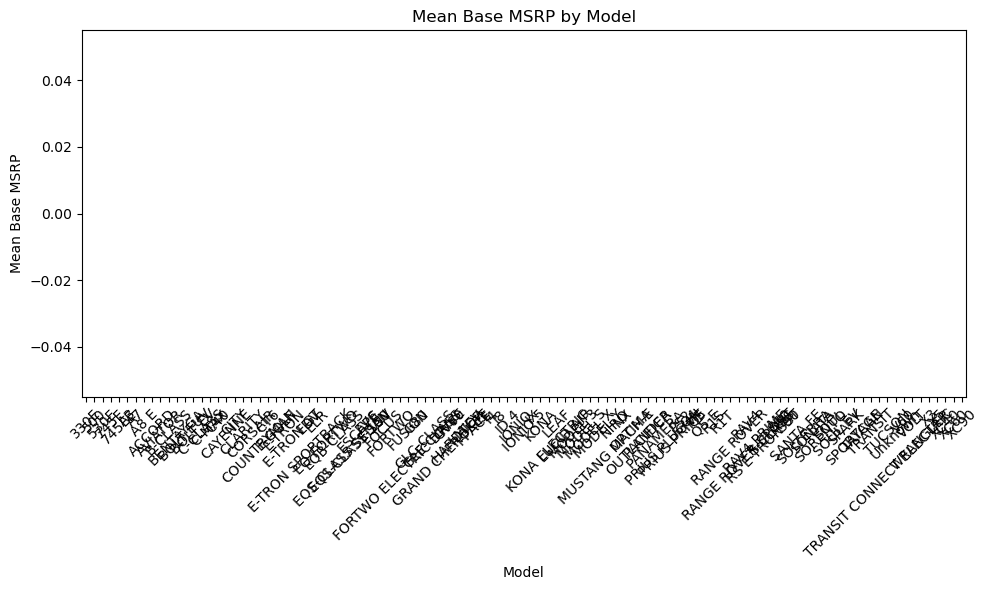

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA test between Model and Base MSRP: F-statistic = nan, p-value = nan


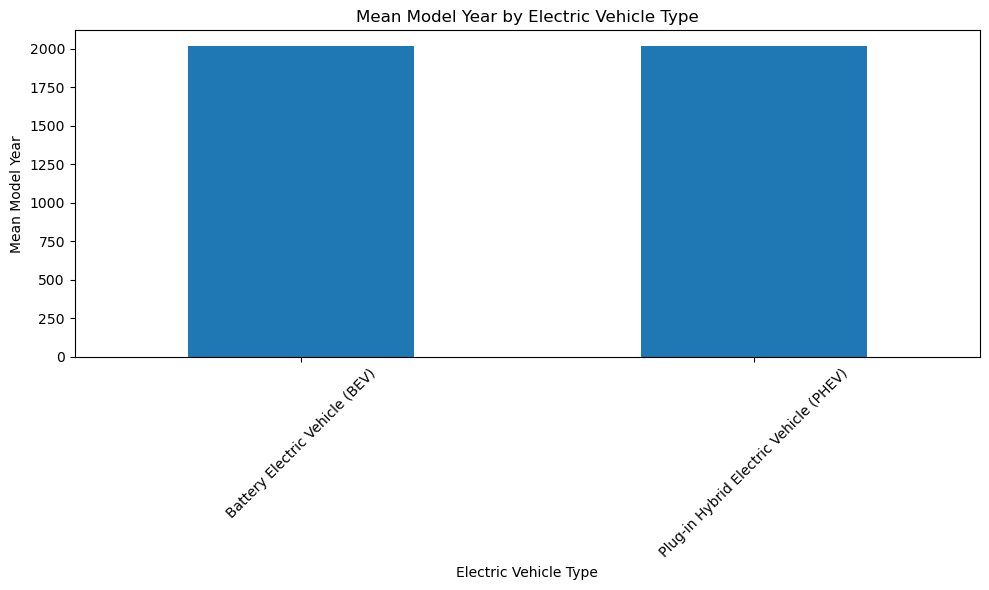

ANOVA test between Electric Vehicle Type and Model Year: F-statistic = 5726.92, p-value = 0.000


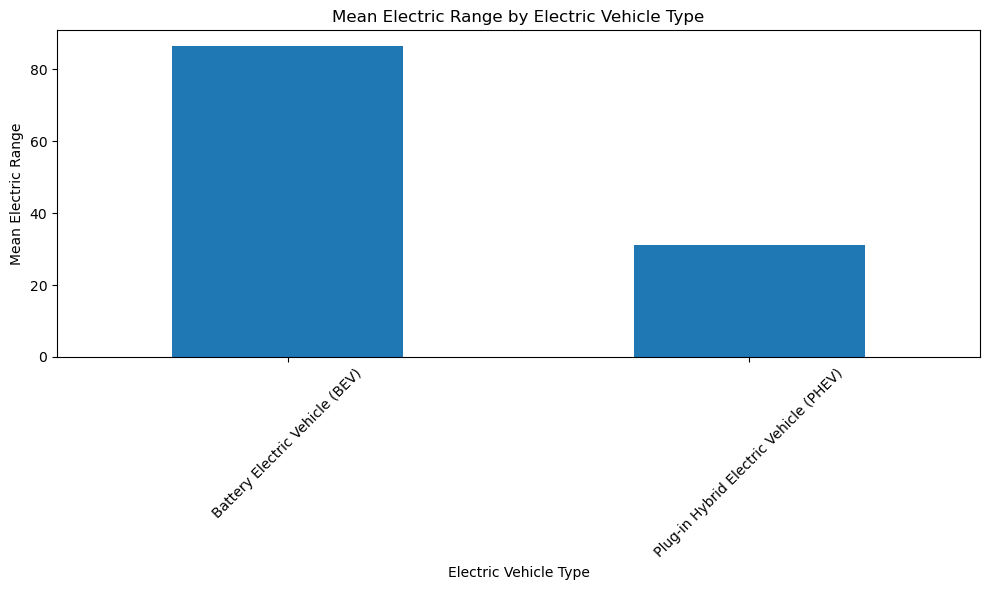

ANOVA test between Electric Vehicle Type and Electric Range: F-statistic = 5214.66, p-value = 0.000


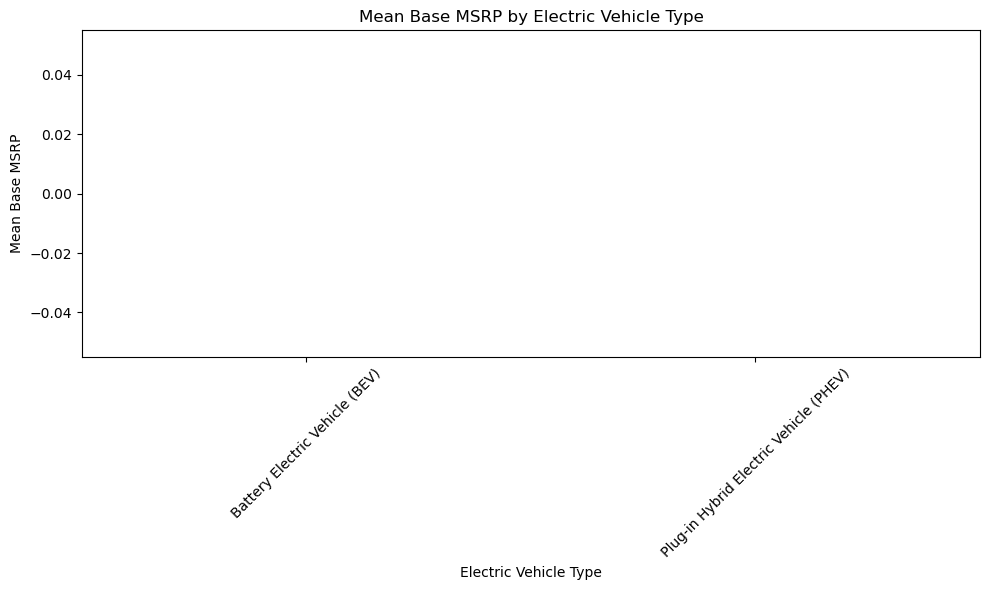

C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


ANOVA test between Electric Vehicle Type and Base MSRP: F-statistic = nan, p-value = nan


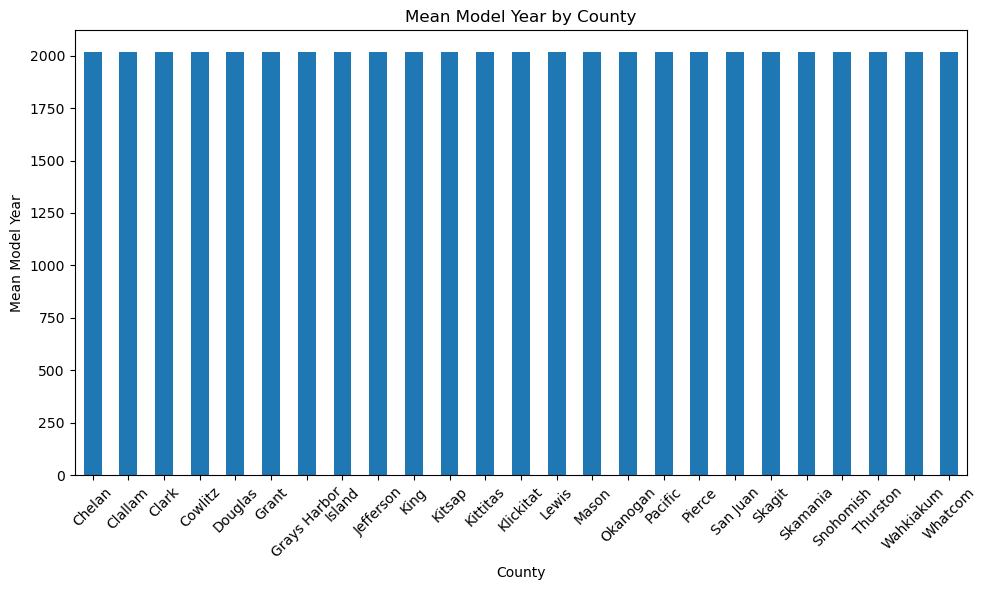

ANOVA test between County and Model Year: F-statistic = 50.56, p-value = 0.000


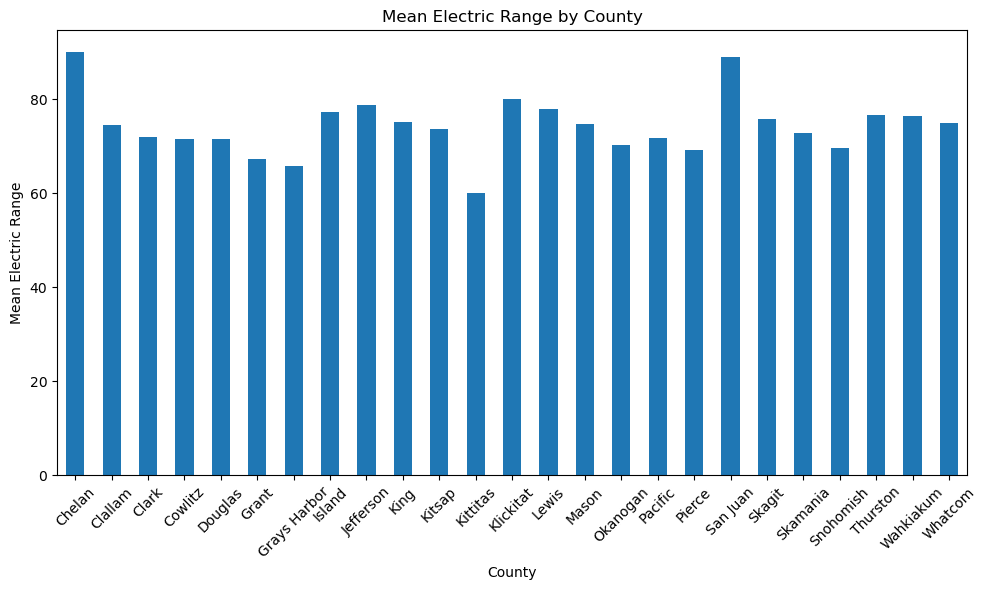

ANOVA test between County and Electric Range: F-statistic = 3.60, p-value = 0.000


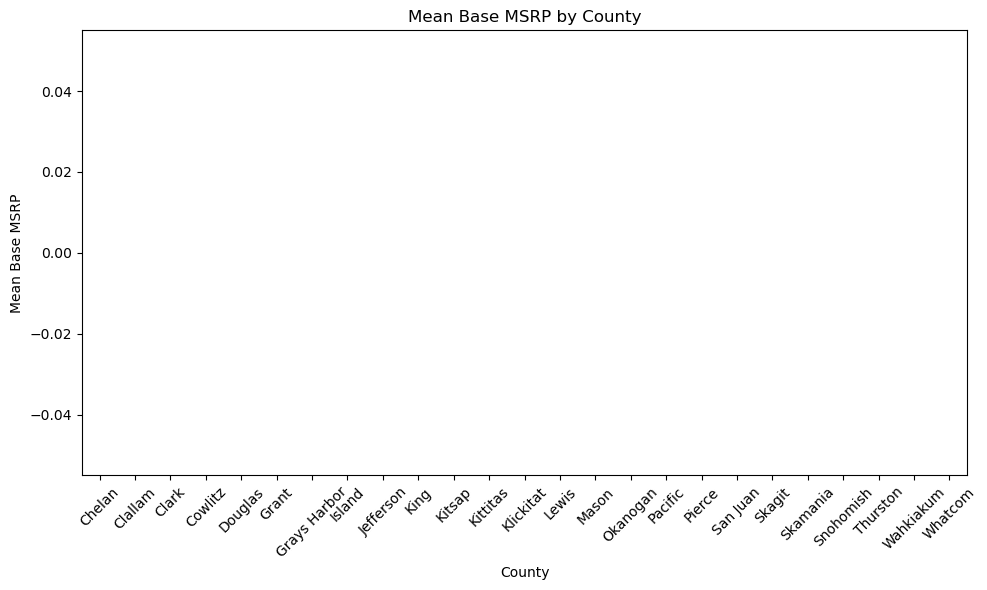

ANOVA test between County and Base MSRP: F-statistic = nan, p-value = nan


C:\Users\Dell\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


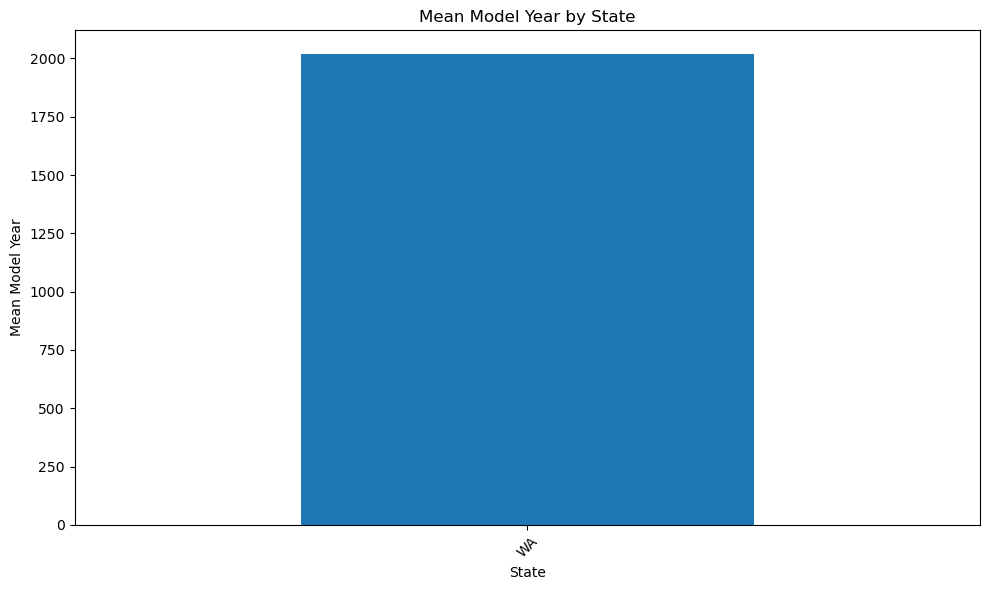

Not enough groups for ANOVA test between State and Model Year


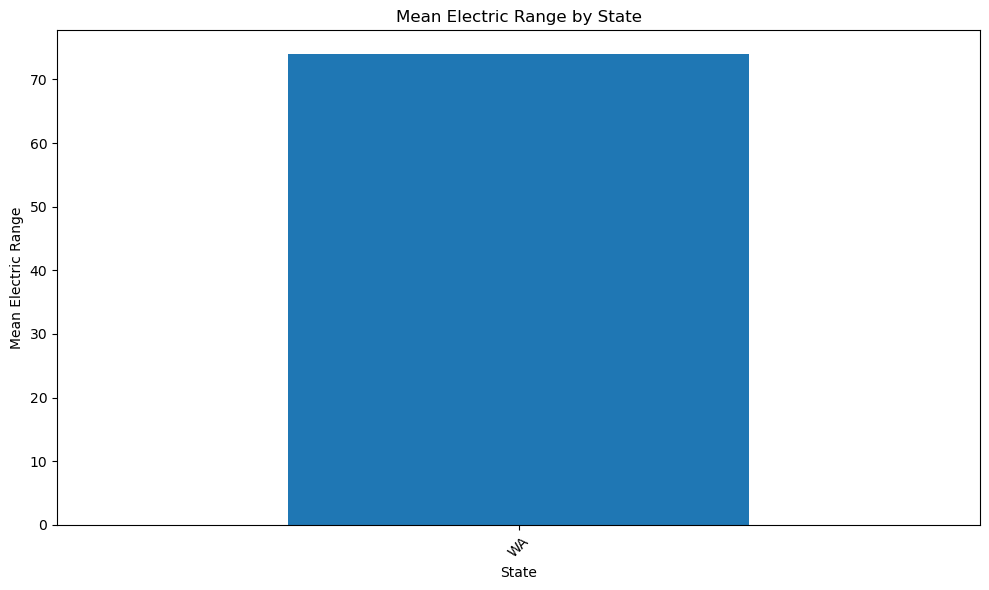

Not enough groups for ANOVA test between State and Electric Range


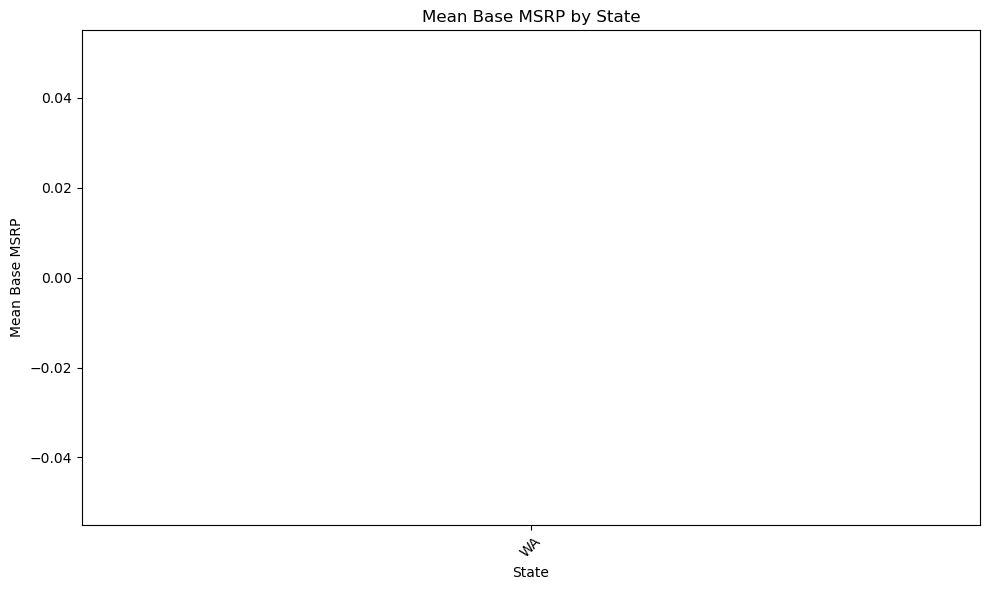

Not enough groups for ANOVA test between State and Base MSRP


In [23]:
# 2. Categorical vs Numerical Analysis using Cross-Tabulation
for cat_col in useful_categorical_columns:
    for num_col in useful_numerical_columns:
        # Create a pivot table to summarize the mean of the numerical column per category
        pivot_table = df.pivot_table(values=num_col, index=cat_col, aggfunc='mean')

        # Plotting the pivot table as a bar plot
        plt.figure(figsize=(10, 6))
        pivot_table[num_col].plot(kind='bar')
        plt.title(f'Mean {num_col} by {cat_col}')
        plt.ylabel(f'Mean {num_col}')
        plt.xlabel(cat_col)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        # ANOVA test
        grouped_data = [group[num_col].values for name, group in df.groupby(cat_col) if len(group) > 1]
        if len(grouped_data) > 1:
            f_stat, p_value = stats.f_oneway(*grouped_data)
            print(f'ANOVA test between {cat_col} and {num_col}: F-statistic = {f_stat:.2f}, p-value = {p_value:.3f}')
        else:
            print(f'Not enough groups for ANOVA test between {cat_col} and {num_col}')

Crosstab between Make and Model:
Model           330E  500  530E  745E  745LE   A3  A7  A8 E  ACCORD  AVIATOR  \
Make                                                                           
AUDI               0    0     0     0      0  453  11     3       0        0   
AZURE DYNAMICS     0    0     0     0      0    0   0     0       0        0   
BENTLEY            0    0     0     0      0    0   0     0       0        0   
BMW              109    0    43     3      2    0   0     0       0        0   
CADILLAC           0    0     0     0      0    0   0     0       0        0   
CHEVROLET          0    0     0     0      0    0   0     0       0        0   
CHRYSLER           0    0     0     0      0    0   0     0       0        0   
FIAT               0  628     0     0      0    0   0     0       0        0   
FORD               0    0     0     0      0    0   0     0       0        0   
GENESIS            0    0     0     0      0    0   0     0       0        0   
HONDA  

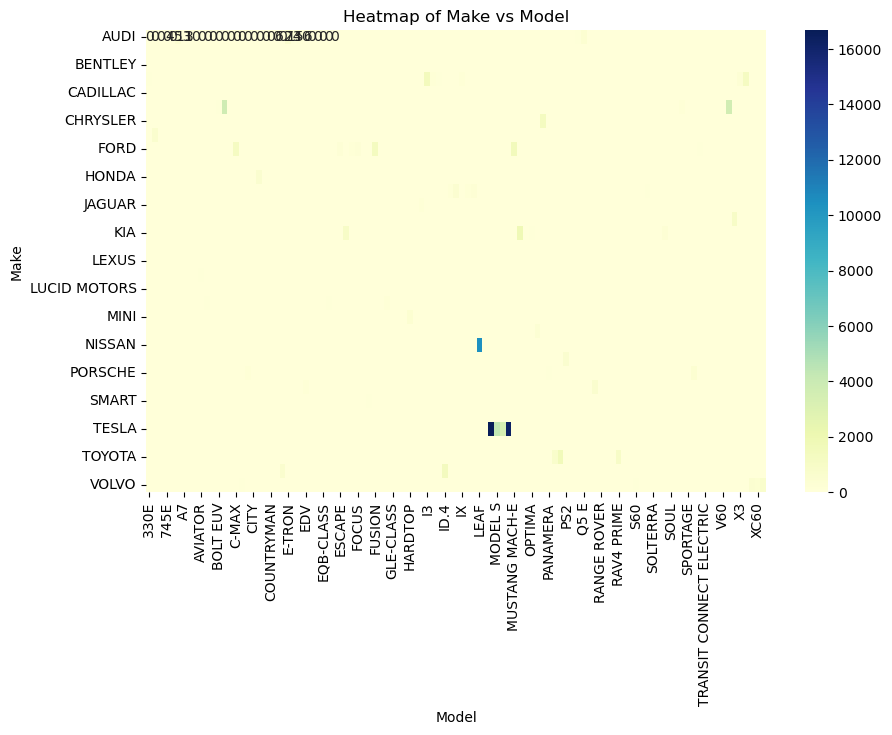

Chi-square test between Make and Model: chi2 = 2825792.00, p-value = 0.000
Crosstab between Make and Electric Vehicle Type:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Make                                                    
AUDI                                              921   
AZURE DYNAMICS                                      6   
BENTLEY                                             0   
BMW                                               808   
CADILLAC                                            0   
CHEVROLET                                        4044   
CHRYSLER                                            0   
FIAT                                              628   
FORD                                             1960   
GENESIS                                            18   
HONDA                                               0   
HYUNDAI                                           998   
JAGUAR                                            165   
JEEP                 

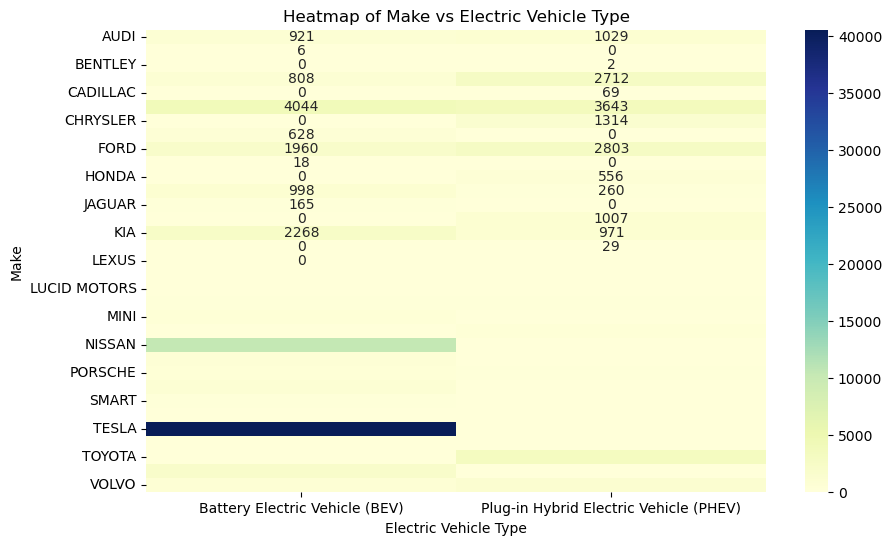

Chi-square test between Make and Electric Vehicle Type: chi2 = 54749.37, p-value = 0.000
Crosstab between Make and County:
County          Chelan  Clallam  Clark  Cowlitz  Douglas  Grant  Grays Harbor  \
Make                                                                            
AUDI                10        4    102        7        2      2             2   
AZURE DYNAMICS       0        0      0        0        0      0             0   
BENTLEY              0        0      0        0        0      0             0   
BMW                 13       14    200       10        4      2            11   
CADILLAC             0        1      8        0        0      1             0   
CHEVROLET           76      117    572       68       21     29            64   
CHRYSLER             6       21     84        7        0      4             4   
FIAT                 4        5     55        7        1      1             9   
FORD                19       51    370       53       18     18    

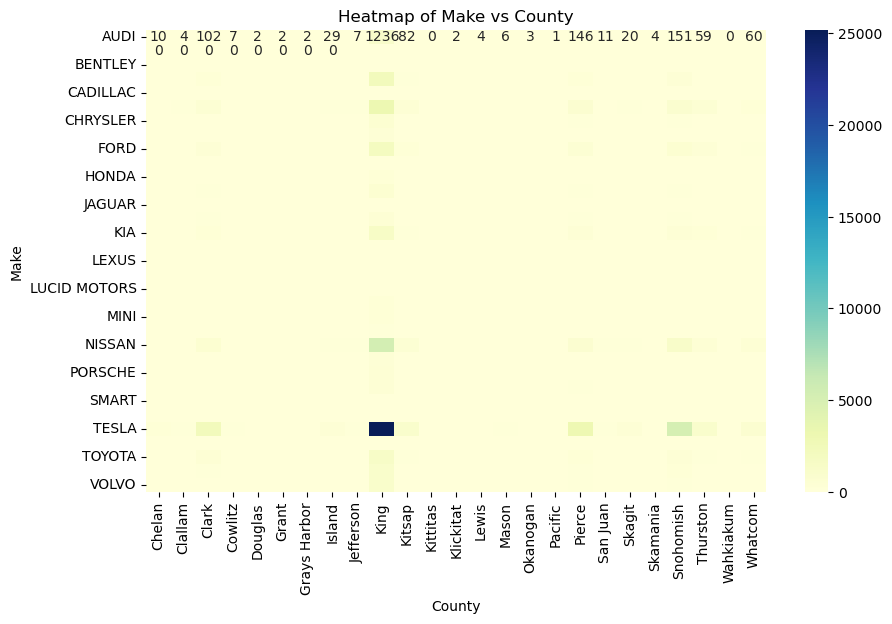

Chi-square test between Make and County: chi2 = 6324.34, p-value = 0.000
Crosstab between Make and State:
State              WA
Make                 
AUDI             1950
AZURE DYNAMICS      6
BENTLEY             2
BMW              3520
CADILLAC           69
CHEVROLET        7687
CHRYSLER         1314
FIAT              628
FORD             4763
GENESIS            18
HONDA             556
HYUNDAI          1258
JAGUAR            165
JEEP             1007
KIA              3239
LAND ROVER         29
LEXUS              29
LINCOLN           157
LUCID MOTORS       57
MERCEDES-BENZ     437
MINI              462
MITSUBISHI        431
NISSAN          10433
POLESTAR          542
PORSCHE           670
RIVIAN            849
SMART             202
SUBARU              1
TESLA           40561
TH!NK               2
TOYOTA           3367
VOLKSWAGEN       2058
VOLVO            1837


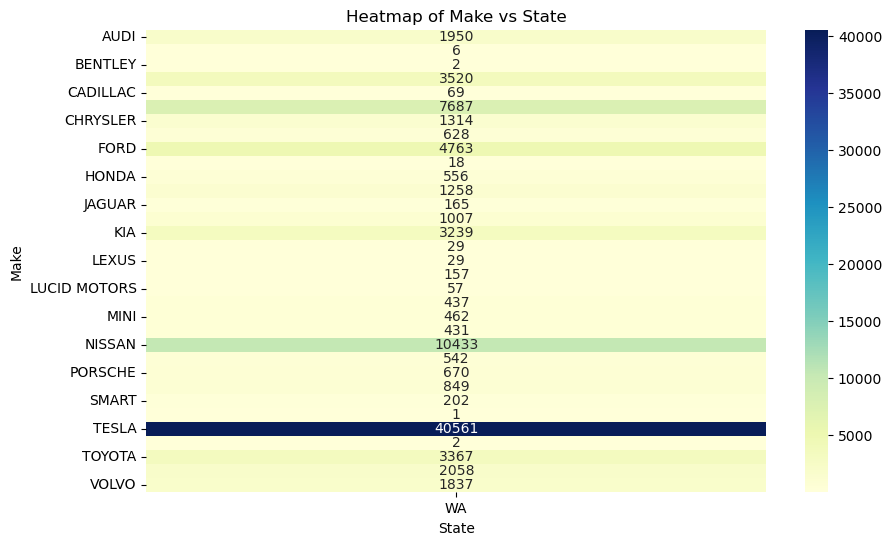

Chi-square test between Make and State: chi2 = 0.00, p-value = 1.000
Crosstab between Model and Electric Vehicle Type:
Electric Vehicle Type  Battery Electric Vehicle (BEV)  \
Model                                                   
330E                                                0   
500                                               628   
530E                                                0   
745E                                                0   
745LE                                               0   
...                                               ...   
X3                                                  0   
X5                                                  0   
XC40                                              488   
XC60                                                0   
XC90                                                0   

Electric Vehicle Type  Plug-in Hybrid Electric Vehicle (PHEV)  
Model                                                          
330E       

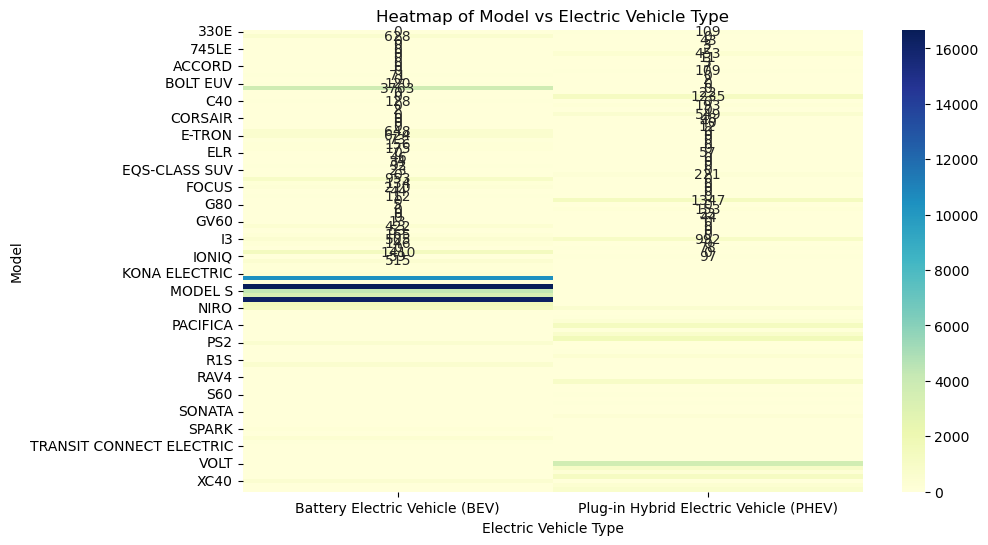

Chi-square test between Model and Electric Vehicle Type: chi2 = 83993.83, p-value = 0.000
Crosstab between Model and County:
County  Chelan  Clallam  Clark  Cowlitz  Douglas  Grant  Grays Harbor  Island  \
Model                                                                           
330E         0        1      5        0        0      0             0       0   
500          4        5     55        7        1      1             9       3   
530E         0        0      5        0        0      0             0       0   
745E         0        0      0        0        0      0             0       0   
745LE        0        0      0        0        0      0             0       0   
...        ...      ...    ...      ...      ...    ...           ...     ...   
X3           0        1     15        0        0      0             0       3   
X5           6        4     64        4        4      0             5       6   
XC40         0        0     22        0        0      1          

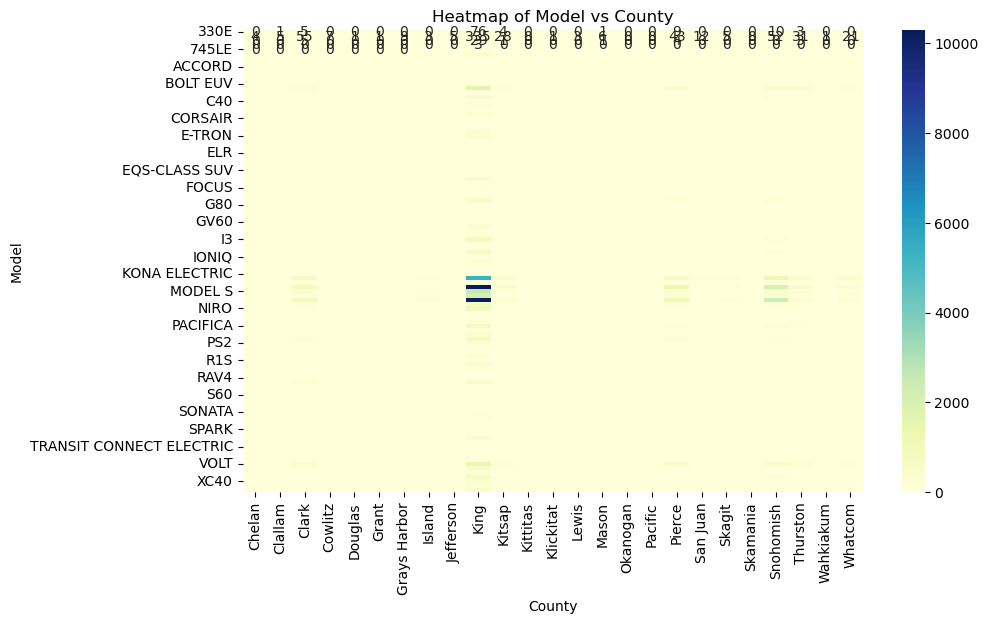

Chi-square test between Model and County: chi2 = 9146.96, p-value = 0.000
Crosstab between Model and State:
State    WA
Model      
330E    109
500     628
530E     43
745E      3
745LE     2
...     ...
X3      277
X5     1208
XC40    488
XC60    442
XC90    658

[107 rows x 1 columns]


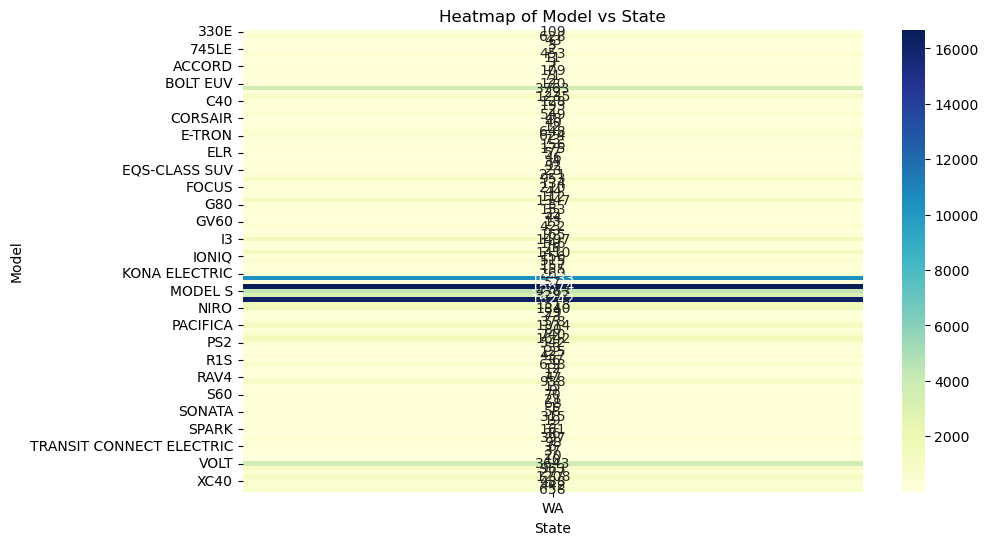

Chi-square test between Model and State: chi2 = 0.00, p-value = 1.000
Crosstab between Electric Vehicle Type and County:
County                                  Chelan  Clallam  Clark  Cowlitz  \
Electric Vehicle Type                                                     
Battery Electric Vehicle (BEV)             441      410   4148      332   
Plug-in Hybrid Electric Vehicle (PHEV)     108      219   1642      159   

County                                  Douglas  Grant  Grays Harbor  Island  \
Electric Vehicle Type                                                          
Battery Electric Vehicle (BEV)              124    114           206     741   
Plug-in Hybrid Electric Vehicle (PHEV)       46     62           128     318   

County                                  Jefferson   King  ...  Okanogan  \
Electric Vehicle Type                                     ...             
Battery Electric Vehicle (BEV)                390  39451  ...        33   
Plug-in Hybrid Electric Vehicle 

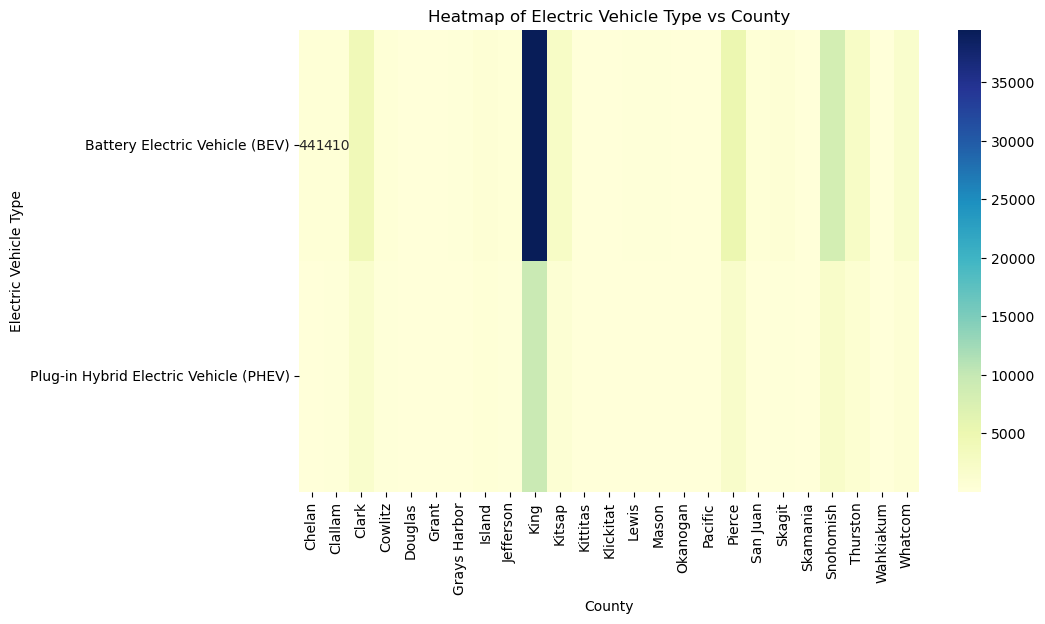

Chi-square test between Electric Vehicle Type and County: chi2 = 1126.69, p-value = 0.000
Crosstab between Electric Vehicle Type and State:
State                                      WA
Electric Vehicle Type                        
Battery Electric Vehicle (BEV)          68296
Plug-in Hybrid Electric Vehicle (PHEV)  20010


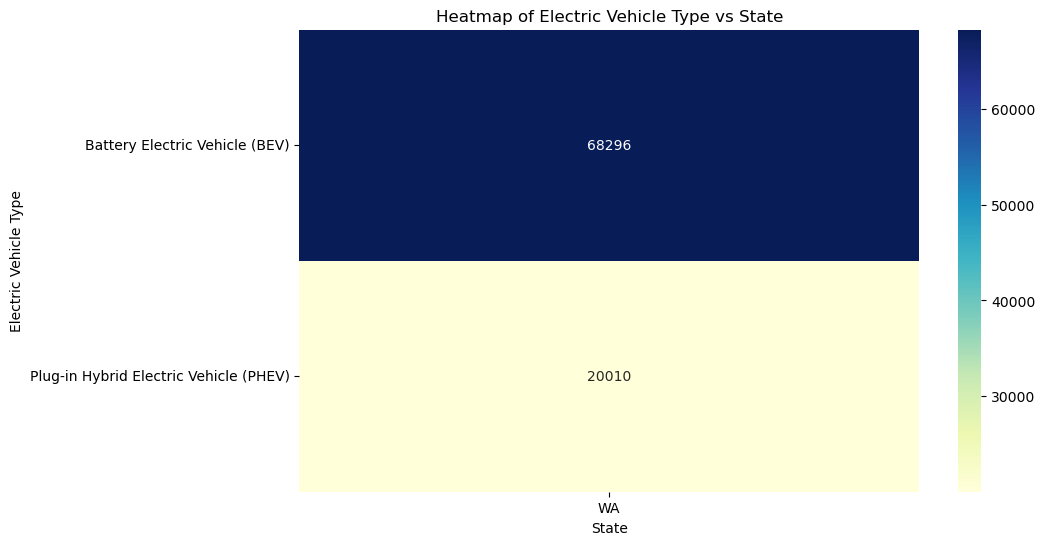

Chi-square test between Electric Vehicle Type and State: chi2 = 0.00, p-value = 1.000
Crosstab between County and State:
State            WA
County             
Chelan          549
Clallam         629
Clark          5790
Cowlitz         491
Douglas         170
Grant           176
Grays Harbor    334
Island         1059
Jefferson       560
King          48995
Kitsap         3238
Kittitas         11
Klickitat       143
Lewis           370
Mason           439
Okanogan         50
Pacific         123
Pierce         7126
San Juan        578
Skagit         1055
Skamania        120
Snohomish     10474
Thurston       3459
Wahkiakum        34
Whatcom        2333


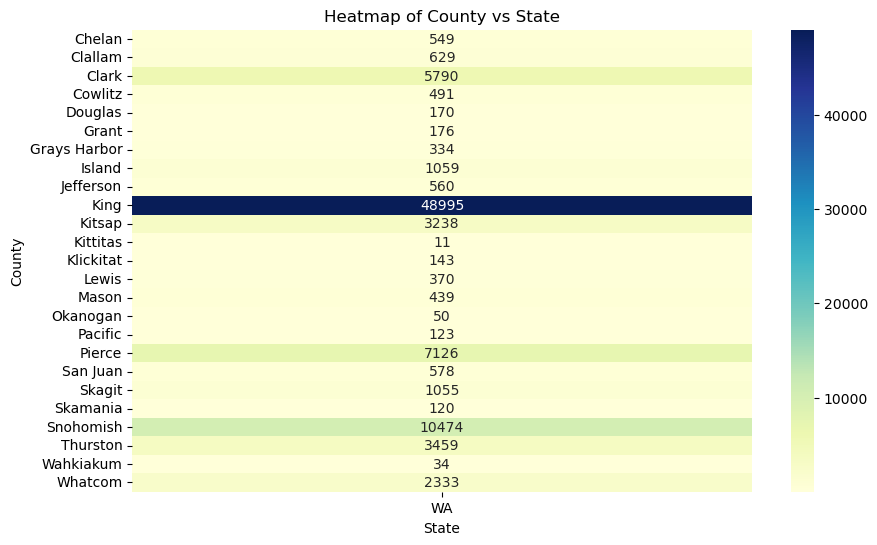

Chi-square test between County and State: chi2 = 0.00, p-value = 1.000


In [24]:
# 3. Categorical vs Categorical Analysis using Cross-Tabulation
for i in range(len(useful_categorical_columns)):
    for j in range(i + 1, len(useful_categorical_columns)):
        crosstab = pd.crosstab(df[useful_categorical_columns[i]], df[useful_categorical_columns[j]])
        
        # Display the cross-tabulation
        print(f'Crosstab between {useful_categorical_columns[i]} and {useful_categorical_columns[j]}:')
        print(crosstab)
        
        # Visualize the crosstab as a heatmap
        plt.figure(figsize=(10, 6))
        sns.heatmap(crosstab, annot=True, fmt='d', cmap='YlGnBu')
        plt.title(f'Heatmap of {useful_categorical_columns[i]} vs {useful_categorical_columns[j]}')
        plt.xlabel(useful_categorical_columns[j])
        plt.ylabel(useful_categorical_columns[i])
        plt.show()

        # Chi-square test
        chi2_stat, p_value, dof, expected = stats.chi2_contingency(crosstab)
        print(f'Chi-square test between {useful_categorical_columns[i]} and {useful_categorical_columns[j]}: chi2 = {chi2_stat:.2f}, p-value = {p_value:.3f}')


In [25]:
!pip install plotly  

In [26]:
import plotly.express as px

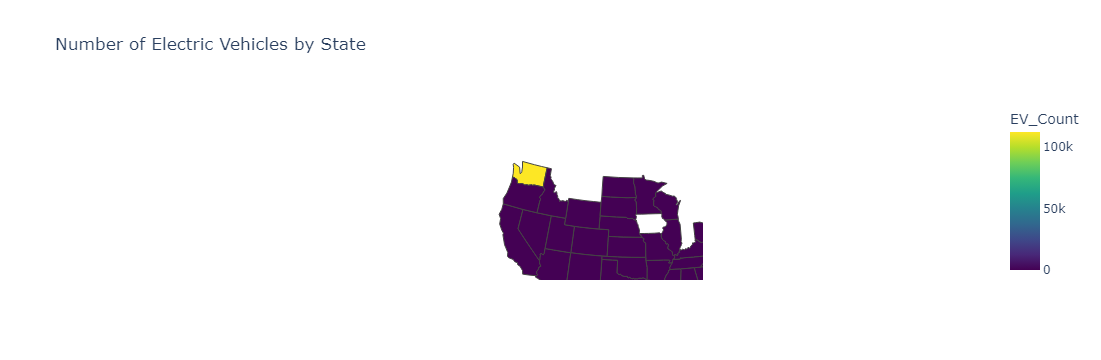

In [28]:
import pandas as pd
import plotly.express as px

# Load your vehicle data into a DataFrame
data = pd.read_csv(r"C:\CSV&EXCELFiles\INTERN_EDA_TASK_DATA\intern_data_2.csv")  # Adjust the file path accordingly

# Assuming 'Electric Vehicle Type' indicates if it's an EV and 'State' contains location info
# Count the number of EVs by State
ev_count_by_state = data[data['Electric Vehicle Type'].notnull()]['State'].value_counts().reset_index()
ev_count_by_state.columns = ['State', 'EV_Count']

# Create the Choropleth Map
fig = px.choropleth(ev_count_by_state,
                    geojson="https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json",
                    locations='State',
                    locationmode='USA-states',
                    color='EV_Count',
                    hover_name='State',
                    color_continuous_scale='Viridis',
                    scope='usa',
                    title='Number of Electric Vehicles by State')

# Update layout to make the map look better
fig.update_geos(fitbounds="locations", visible=False)
fig.show()


In [29]:
!pip install bar-chart-race

   ---------------------------------------- 0.0/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   -- ------------------------------------- 10.2/156.8 kB ? eta -:--:--
   ---------- ---------------------------- 41.0/156.8 kB 326.8 kB/s eta 0:00:01
   ----------------------------- -------- 122.9/156.8 kB 798.9 kB/s eta 0:00:01
   -------------------------------------- 156.8/156.8 kB 852.2 kB/s eta 0:00:00


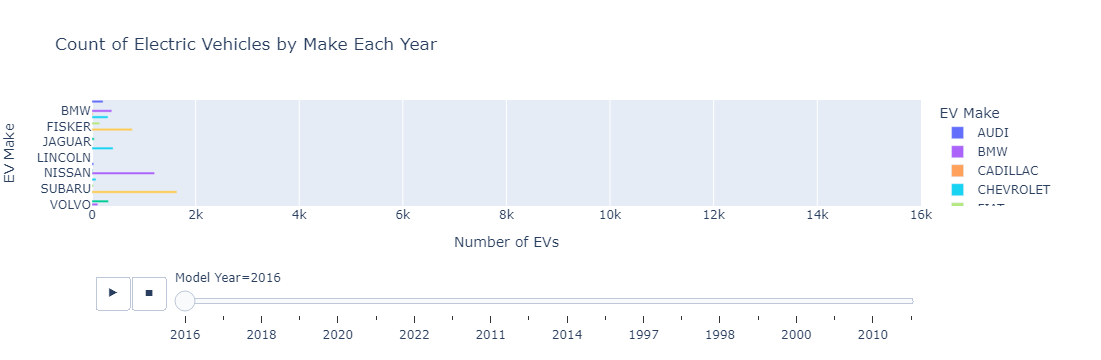

In [30]:
import bar_chart_race as bcr
#Filter data for Electric Vehicles
# Assuming 'Electric Vehicle Type' indicates if it's an EV and 'Model Year' contains the year
ev_data = data[data['Electric Vehicle Type'].notnull()]

# Count the number of EVs by Make and Model Year
ev_counts = ev_data.groupby(['Make', 'Model Year']).size().reset_index(name='Count')

# Create the Racing Bar Plot
fig = px.bar(ev_counts, 
             x='Count', 
             y='Make', 
             color='Make', 
             animation_frame='Model Year', 
             range_x=[0, ev_counts['Count'].max() * 1.1],  # Adjust range for better visualization
             title='Count of Electric Vehicles by Make Each Year',
             labels={'Count': 'Number of EVs', 'Make': 'EV Make'},
             orientation='h')

# Show the plot
fig.show()